In [1]:
import datetime as dt

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
df=pd.read_csv('avocado_dataset.csv')

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2/4/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,1/28/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,1/21/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,1/14/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


EDA

In [4]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

we can observe all columns are float in nature except date,region and type 

In [5]:
df.shape

(18249, 14)

In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

the 'Unnamed:0'column is numbered like index which is not related for analysis hence we will drop the column

In [7]:
df.drop('Unnamed: 0',inplace=True,axis=1)

UNDERSTANDING THE COLUMNS

In [8]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [9]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

we dont have any null or NaN values in the dataset

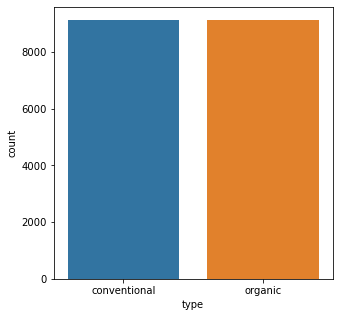

In [10]:
plt.figure(figsize=(5,5))
sns.countplot(df.type)

In [11]:
df.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

their is 2 category in type column conventional and organic which looks like equally distributed while plotting,but when we derive numerical results conventionaltype of avacados slightly high in number

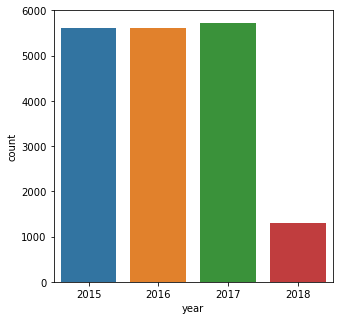

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(df.year)

In [13]:
df.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

The data has been collected from 2015,2016,2017 & 2018, information is not evenly extracted from all years,we can see 2017 has highest and 2018 with least data

In [14]:
df.region.value_counts()

Boston                 338
Nashville              338
SouthCarolina          338
RaleighGreensboro      338
Louisville             338
Syracuse               338
CincinnatiDayton       338
RichmondNorfolk        338
Orlando                338
Southeast              338
Tampa                  338
NorthernNewEngland     338
Spokane                338
SanFrancisco           338
Charlotte              338
Roanoke                338
West                   338
Portland               338
Columbus               338
Philadelphia           338
Detroit                338
LasVegas               338
StLouis                338
Sacramento             338
HartfordSpringfield    338
Midsouth               338
GrandRapids            338
GreatLakes             338
SanDiego               338
Atlanta                338
Boise                  338
PhoenixTucson          338
LosAngeles             338
Albany                 338
Northeast              338
MiamiFtLauderdale      338
California             338
S

we have got 54 varities of regions from which data is taken

In [15]:

df.groupby('year')['type'].value_counts()


year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

we can observe 2016 and 2018 the conventional amd organic avacados sold equal numbers and in 2015 and 2017 conventional types was sold at insignificantly high volume

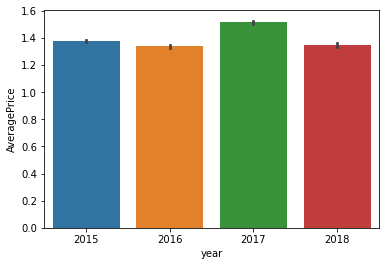

In [16]:
sns.barplot(x='year',y='AveragePrice',data=df)

From the above barplot we can understand the average price was high in the year 2017 and lowest in 2016

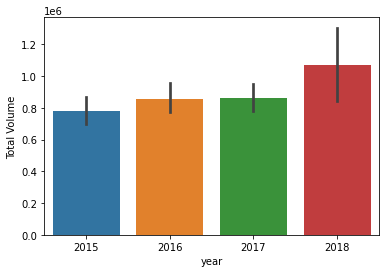

In [17]:
sns.barplot(x='year',y='Total Volume',data=df)

Volume of sales is high in 2018 and lowest in 2015

TypeError: xlabel() missing 1 required positional argument: 'xlabel'

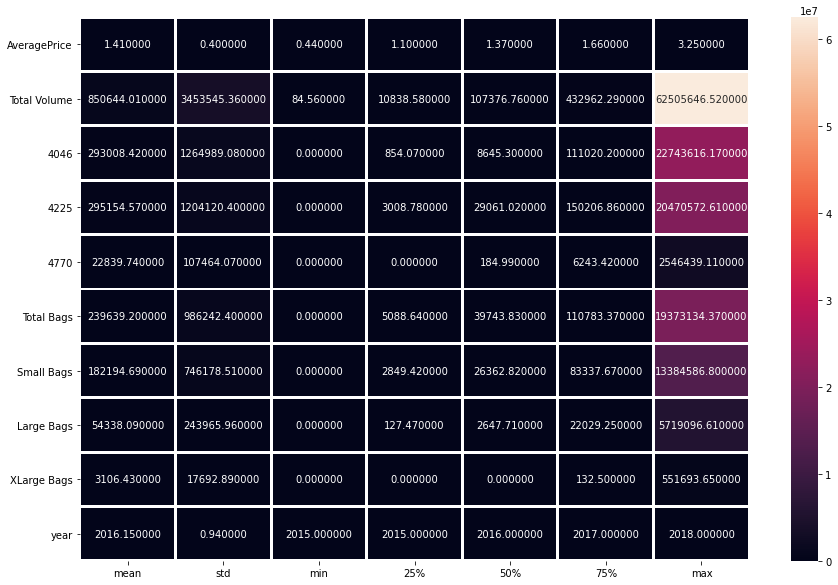

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xlabel(fontsize=17)
plt.ylabel(fontsize=15)

plt.show()




AveragePrice:No deviation between mean and median,max and 75% has difference and also the data has disparity with mean and STD,              which shows data is not normally distributed
Total Volume: we can find outliers as mean and median,mean and standard deviation and 75% with max values have more variations               than normal
4046:we can find outliers as mean and median,mean and standard deviation and 75% with max values have more variations               than normal
4225:we can find outliers as mean and median,mean and standard deviation and 75% with max values have more variations               than normal
4770:we can find outliers as mean and median,mean and standard deviation and 75% with max values have more variations               than normal
Total Bags:we can find outliers as mean and median,mean and standard deviation and 75% with max values have more variations               than normal
Small Bags:we can find outliers as mean and median,mean and standard deviation and 75% with max values have more variations                than normal
Large Bags:we can find outliers as mean and median,mean and standard deviation and 75% with max values have more variations                than normal
XLarge Bags:we can find outliers as mean and median,mean and standard deviation and 75% with max values have more variations               than normal
year:No deviation between mean and median,max and 75% has negligable difference

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr())
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

Total number of avocados sold with PLU 4225 and  PLU 4046 has highest correlation of 975 and 985 respectively
small bags sold are correlated 97% with total number of volume sold out total bags sold is 96% of totalvolume

xl bags are comparitvely less sold i,e., 75% and number of avocados sold with PLU 4770 is also less as it shows 875 correlation 

average price and year has no correlation


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1DF71DF10>,
      dtype=object)

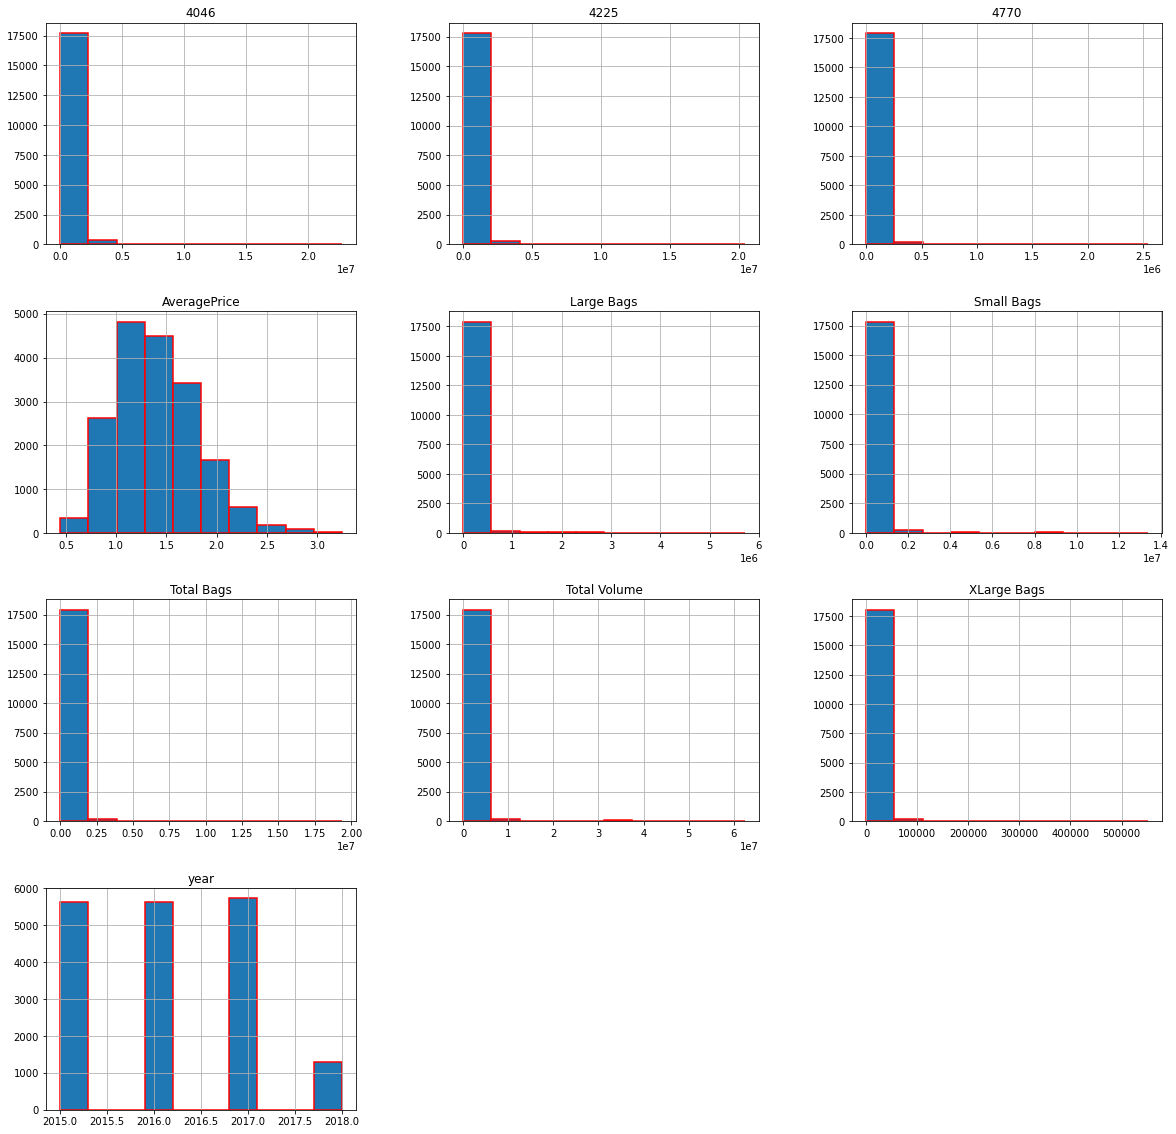

In [19]:
df.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

From the above chart we can see the data is not normally distributed except average price data,hence we will check the level of skewness with each attribute and remove the outliers to make further analysis

CHECKING FOR OUTLIERS 

checking outiers on sub categories

Text(0, 0.5, 'Total Volume')

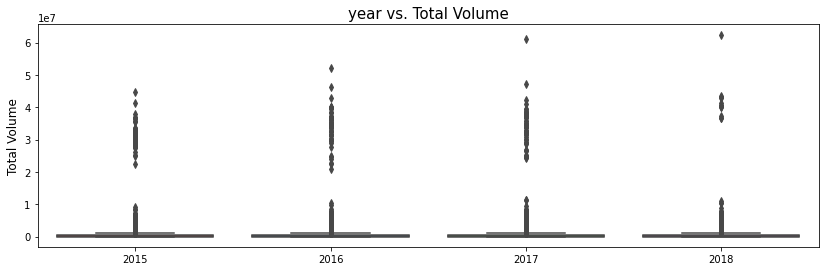

In [20]:
plt.figure(figsize = (14,9))

plt.subplot(211)
a = sns.boxplot(x='year', y='Total Volume', data=df, palette="Set1")
a.set_title("year vs. Total Volume", fontsize=15)
a.set_xlabel("", fontsize=12)
a.set_ylabel("Total Volume", fontsize=12)

From the above figure we can outliers present in sales volume of all years

Text(0, 0.5, 'Total Volume')

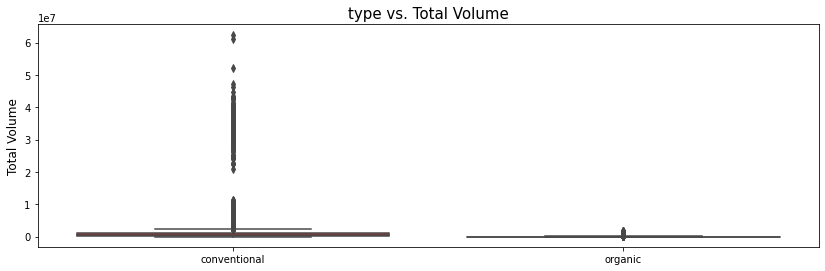

In [21]:
plt.figure(figsize = (14,9))

plt.subplot(211)
a = sns.boxplot(x='type', y='Total Volume', data=df, palette="Set1")
a.set_title("type vs. Total Volume", fontsize=15)
a.set_xlabel("", fontsize=12)
a.set_ylabel("Total Volume", fontsize=12)

conventional type of avacados has more outliers than organic type of avacados

checking outliers on all attributes 

AveragePrice        AxesSubplot(0.125,0.71587;0.168478x0.16413)
Total Volume     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
4046             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
4225             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
4770               AxesSubplot(0.125,0.518913;0.168478x0.16413)
Total Bags      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Small Bags      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Large Bags      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
XLarge Bags        AxesSubplot(0.125,0.321957;0.168478x0.16413)
year            AxesSubplot(0.327174,0.321957;0.168478x0.16413)
dtype: object

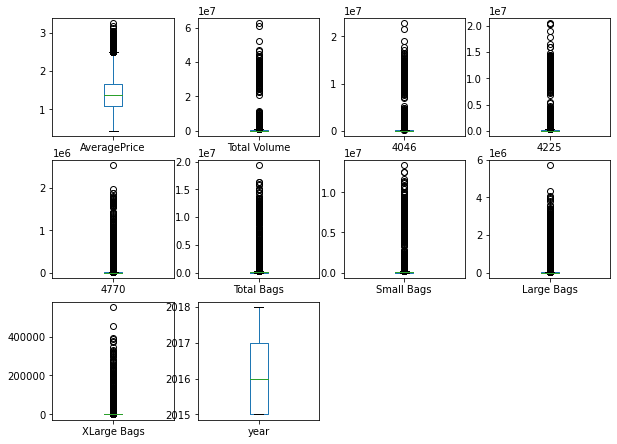

In [22]:
df.plot(kind='box',subplots= True,layout=(4,4),figsize=(10,10))

We have got the same results as histogram plots,all columns except average price and year we find outliers present 
lets observe the level of skewness in each attribute

In [23]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

We can observe from above data
-->high skewness in XLarge bags with 13.14 and number of avocados with PLU 4770 with 10.16
-->total bags with 9.75,Large bags with 9.79, small bags with 9.54, total sales volume with 9
-->number of avocados with PLU 4046 with 8.64 and number of avocados with PLU 4225 with 8.94

Therfore we can conclude from histogram, boxplot of outliers and skewness data that all the attributes are having outliers other than AveragePrice


DATA CLEANING

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['type']=le.fit_transform(df['type'])
df['type']
df['region']=le.fit_transform(df['region'])
df['region']

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

In [25]:
import datetime

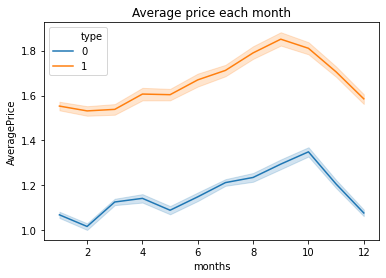

In [26]:
df['Date']=pd.to_datetime(df['Date'])
df["months"]=df['Date'].map(lambda x : x.month)
plt.title('Average price each month')
sns.lineplot(x='months',y='AveragePrice',data=df,hue='type')

the above data shows the prices are not even in all the months, which means prices fluctuate according to seasonal changes

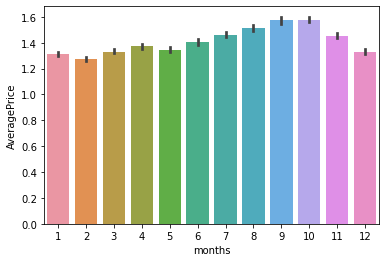

In [27]:
sns.barplot(x='months',y='AveragePrice',data=df)

In [ ]:
da=pd.to_datetime(df['Date'],errors='coerce')
df['Date']=da.dt.strftime("%Y%m%d").astype(int)

In [ ]:
df.dtypes

In [29]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([3, 3, 9, ..., 1, 1, 1], dtype=int64))

In [30]:
new_df=df[(z<3).all(axis=1)]
new_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,months
0,20151227,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,20151220,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,20151213,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,20151206,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,20151129,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,20180204,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2
18245,20180128,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1
18246,20180121,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1
18247,20180114,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1


In [31]:
df.shape

(18249, 14)

In [32]:

percentage_loss=((18249-17651 )/18249)*100
print(percentage_loss)

3.276891884486821


if we opt to remove outliers through zscore we will be loosing 3.27% of data

In [33]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Date             19579.00
AveragePrice         0.56
Total Volume    422123.71
4046            110166.13
4225            147198.08
4770              6243.42
Total Bags      105694.73
Small Bags       80488.25
Large Bags       21901.78
XLarge Bags        132.50
type                 1.00
year                 2.00
region              27.00
months               6.00
dtype: float64


In [34]:
new_df2=df[~((df<Q1-(1.5*IQR))|(df>(Q3+(1.5*IQR)))).any(axis=1)]
new_df2

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,months
0,20151227,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,20151220,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,20151213,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,20151206,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12
4,20151129,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,20180204,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2
18245,20180128,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1
18246,20180121,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1
18247,20180114,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1


In [35]:
percentage_loss=((18249-11538  )/18249)*100
print(percentage_loss)

36.774617787276014


the above quartile method we will be loosing 36.77% of data which is too high hence we choose zscoremethod

In [36]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'months'],
      dtype='object')

In [37]:
from sklearn.model_selection import train_test_split
x = new_df[['Date','AveragePrice','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year','region','months']]
y = new_df['Total Volume']

In [38]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.15370161, -0.19535234, -0.34945151, ..., -1.21001338,
        -1.69549505,  1.64461178],
       [-1.15445054, -0.1435096 , -0.3502761 , ..., -1.21001338,
        -1.69549505,  1.64461178],
       [-1.15519947, -1.2322071 , -0.35000214, ..., -1.21001338,
        -1.69549505,  1.64461178],
       ...,
       [ 1.93768269,  1.20440158, -0.34909848, ...,  1.98075592,
         1.74705401, -1.46287832],
       [ 1.93693376,  1.35992979, -0.34833475, ...,  1.98075592,
         1.74705401, -1.46287832],
       [ 1.93618483,  0.55636736, -0.34522454, ...,  1.98075592,
         1.74705401, -1.46287832]])

In [39]:
y=le.fit_transform(y)

In [40]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

Classification

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
lr=LogisticRegression()

lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

REGRESSOR MODEL BUILDING

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import r2_score
from sklearn import linear_model

In [64]:
max_r_score=0
for r_state in range (10,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20) 
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print("max r2 score corresponding to:-",final_r_state,"is",max_r_score)


max r2 score corresponding to:- 72 is 0.9245974814484139


In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=72,test_size=0.20) 


In [66]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=2,scoring="r2").mean()

-1.6542460872216538

LINEAR REGRESSION

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=72,test_size=0.20) 
lreg=linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [68]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print ("r2 score is ",r2_score,(x_test,y_pred))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is  <function r2_score at 0x0000021F8E0899D0> (array([[-0.03220028,  0.66412045, -0.75858621, ..., -0.07694938,
        -1.37414672,  1.33367942],
       [ 0.94225674,  0.12365688,  1.44193272, ...,  0.93142068,
         0.32156548,  0.26989351],
       [-0.07407158, -0.96209152,  0.04033791, ..., -0.07694938,
         0.83865588,  0.26989351],
       ...,
       [-0.14116072, -0.6299955 ,  0.19947826, ..., -0.07694938,
         1.41847576, -1.51060352],
       [-1.22714704,  0.25169584, -0.78645654, ..., -1.25836835,
        -0.13271647,  0.81107119],
       [-0.12884254,  0.14955782, -0.7608938 , ..., -0.07694938,
        -0.78489651, -1.20047358]]), array([ 8213.45601743, 11302.63651062,  9821.94308249, ...,
       10720.58325853,  3622.98219444,  3787.03624494]))
RMSE is : 1404.536207345662


In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

LASSO REGRESSION

In [70]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf= GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [ ]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
for j in range (2,10):
    lsscore=cross_val_score(ls,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("Cross validation score is :-",lsc*100)
    print("R2_score is:-",lss*100)
    print("\n")

In [ ]:
print ("at cv :-",7)
print("at cross validation score is :-",76.9042)
print("r2_score:-",92.4548)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_ls))
print('MeanSquaredError:',mean_squared_error(y_test,pred_ls))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_ls)))

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Sales of Avacados",fontsize=14)
plt.ylabel("Predicted Sales of Avacados",fontsize=14)
plt.title("LassoRegression",fontsize=18)
plt.show()

In [ ]:
#DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['mse','friedman_mse','mae'],'splitter':['best','random']}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

In [ ]:
dt=DecisionTreeRegressor(criterion='mse',splitter='best')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision=dt.predict(x_test)

dts=r2_score(y_test,pred_decision)
print('R2 Score:',dts*100)

dtscore=cross_val_score(dt,x,y,cv=7)
dtc=dtscore.mean()
print('cross val score:',dtc*100)

In [ ]:
print('Error:-')
print('MeanAbsoluteError:',mean_absolute_error(y_test,pred_decision))
print('MeanSquaredError:',mean_squared_error(y_test,pred_decision))
print('RootMeanSquareError:',np.sqrt(mean_squared_error(y_test,pred_decision)))

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Sales of Avacados",fontsize=14)
plt.ylabel("Predicted Sales of Avacados",fontsize=14)
plt.title("DecisionTreeRegressor",fontsize=18)
plt.show()

In [19]:
#GradientBoostingRegressor

In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['ls','lad','huber','quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse','mse']}
gbr=GradientBoostingRegressor()
clf=GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
                         
print(clf.best_params_)